In [87]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [88]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.1_classification/diabetes.csv")

In [89]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [93]:
y.shape, X.shape

((768,), (768, 8))

In [94]:
logistic = LogisticRegression()

In [95]:
logistic.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252342e-01  3.35998330e-02 -1.40873785e-02 -1.27048112e-03
 -1.24032092e-03  7.72023486e-02  1.41904173e+00  1.00353713e-02]


In [97]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136


In [98]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70291291]


In [99]:
y_pred = logistic.predict(X)

In [100]:
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [101]:

metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

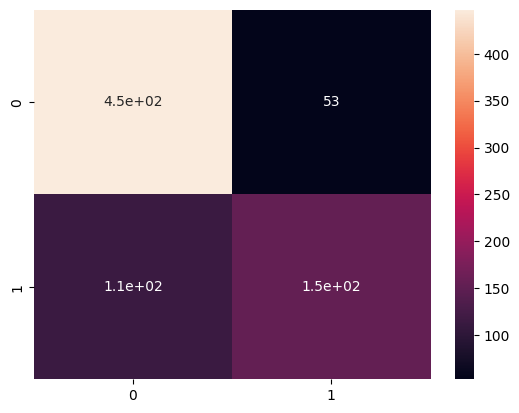

In [102]:

sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [103]:
logistic.score(X, y)

0.7825520833333334

In [104]:
poly = PolynomialFeatures(2)

In [105]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [106]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
logistic_test_1 = LogisticRegression(penalty="l2", tol=1e-5, C=3.0, intercept_scaling=3, max_iter=1000)
logistic_test_2 = LogisticRegression(penalty="l2", tol=1e-1, C=1.0, intercept_scaling=1, max_iter=100)

In [109]:
logistic_test_1.fit(X_train, y_train)
logistic_test_2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [110]:
y_pred = logistic_test_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [111]:
y_pred = logistic_test_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [112]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import pandas as pd

Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:

Метод опорных векторов

Без ядра

С линейным ядром

С гауссовым ядром

С полиномиальным ядром

Метод ближайших соседей

Многослойный перцептрон

Дерево решений

Наивный байесовский классификатор

(*) Другие методы:

Пассивно-агрессивный классификатор

Гребневый классификатор

Случайный лес

Беггинг

Другие модели по желанию

In [113]:
models = []
models.append(SVC())
models.append(SVC(kernel='linear'))
models.append(SVC(kernel='rbf'))
models.append(SVC(kernel='poly'))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000))
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(PassiveAggressiveClassifier())
models.append(RidgeClassifier())
models.append(RandomForestClassifier())
models.append(BaggingClassifier())

Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [114]:
def auto_learning(models, X_train, X_test, y_train, y_test):
    dict_1 = {}
    for model in models:
        dict_1["Metrix"] = ["Accuracy", "Precision", "Recall", "F1-score"]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model)
        print("ACCURACY: ", accuracy_score(y_test, y_pred))
        print("PRECISION:", precision_score(y_test, y_pred, average='weighted'))
        print("RECALL:   ", recall_score(y_test, y_pred, average='weighted'))
        print("F1:       ", f1_score(y_test, y_pred, average='weighted'))
        sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
        plt.show()
        name = str(model)
        dict_1[name[0:20]] = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted')]
        print()
    print(pd.DataFrame(dict_1))

SVC()
ACCURACY:  0.7662337662337663
PRECISION: 0.7613360869174822
RECALL:    0.7662337662337663
F1:        0.758600583090379


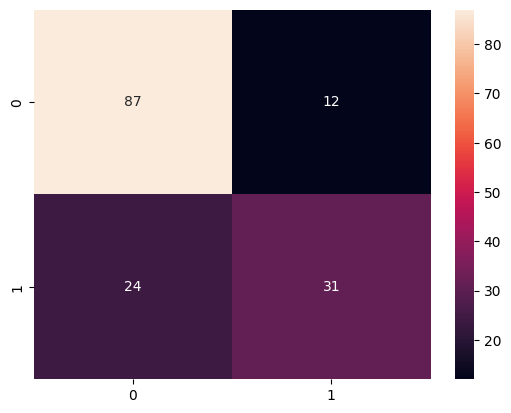


SVC(kernel='linear')
ACCURACY:  0.7532467532467533
PRECISION: 0.7532467532467533
RECALL:    0.7532467532467533
F1:        0.7532467532467533


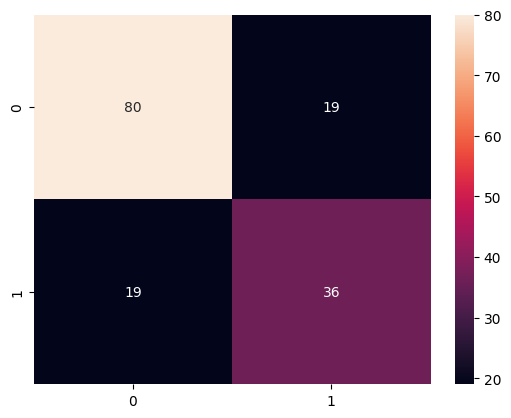


SVC()
ACCURACY:  0.7662337662337663
PRECISION: 0.7613360869174822
RECALL:    0.7662337662337663
F1:        0.758600583090379


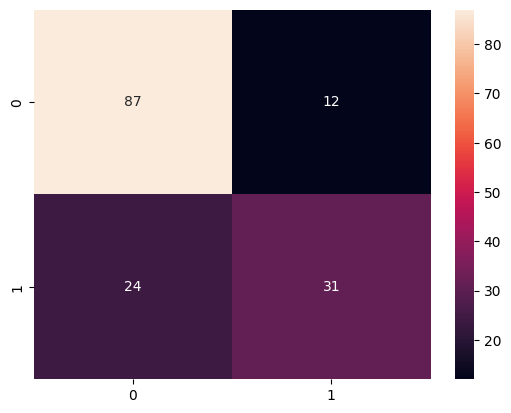


SVC(kernel='poly')
ACCURACY:  0.7597402597402597
PRECISION: 0.7544642857142857
RECALL:    0.7597402597402597
F1:        0.751041746644424


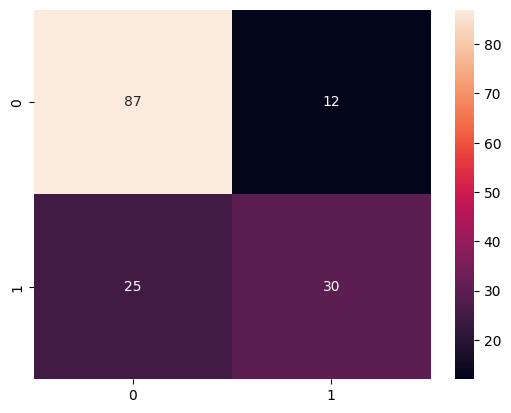


KNeighborsClassifier(n_neighbors=3)
ACCURACY:  0.6493506493506493
PRECISION: 0.6727560589453173
RECALL:    0.6493506493506493
F1:        0.6558054498096573


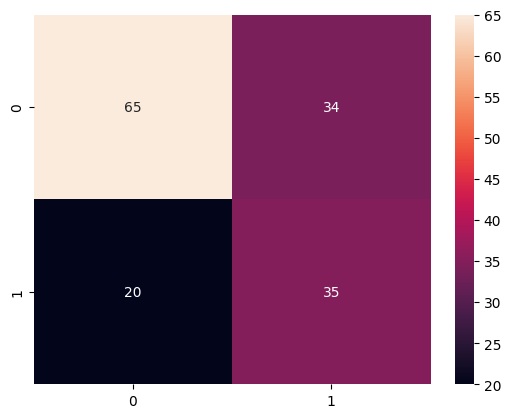


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
ACCURACY:  0.6428571428571429
PRECISION: 0.413265306122449
RECALL:    0.6428571428571429
F1:        0.5031055900621119


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


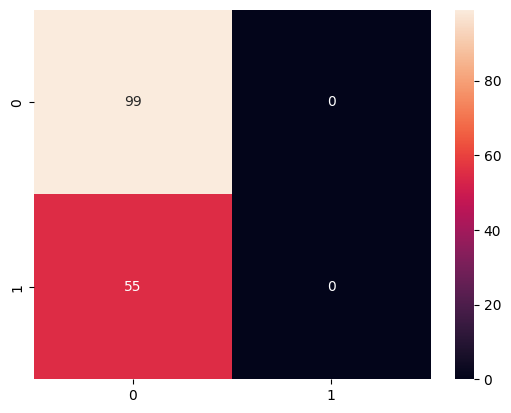

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



DecisionTreeClassifier()
ACCURACY:  0.7597402597402597
PRECISION: 0.7684582248046484
RECALL:    0.7597402597402597
F1:        0.7625248515300871


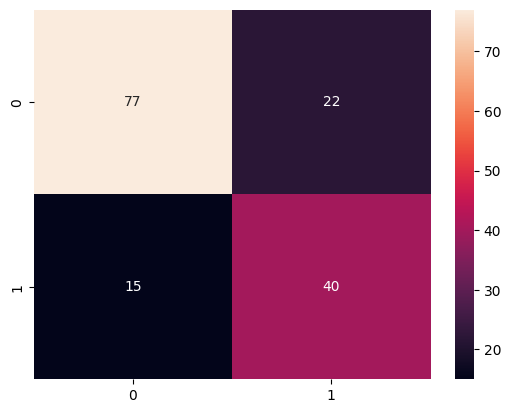


GaussianNB()
ACCURACY:  0.7662337662337663
PRECISION: 0.7706639480056073
RECALL:    0.7662337662337663
F1:        0.7679249670568175


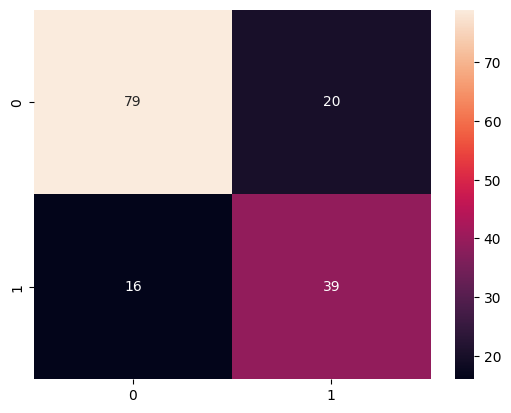


PassiveAggressiveClassifier()
ACCURACY:  0.35714285714285715
PRECISION: 0.12755102040816327
RECALL:    0.35714285714285715
F1:        0.18796992481203006


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


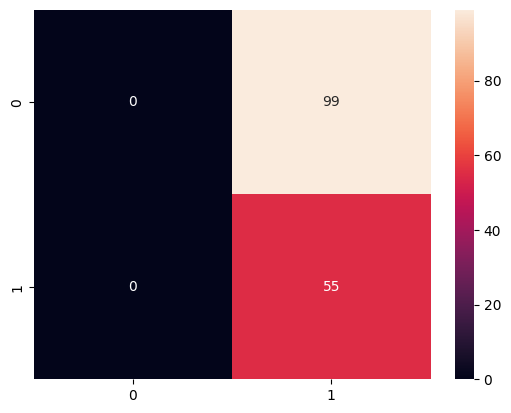

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



RidgeClassifier()
ACCURACY:  0.7597402597402597
PRECISION: 0.7607507288629737
RECALL:    0.7597402597402597
F1:        0.7602127145274353


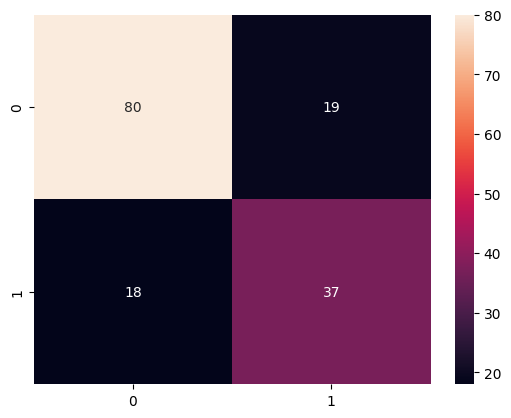


RandomForestClassifier()
ACCURACY:  0.7597402597402597
PRECISION: 0.7607507288629737
RECALL:    0.7597402597402597
F1:        0.7602127145274353


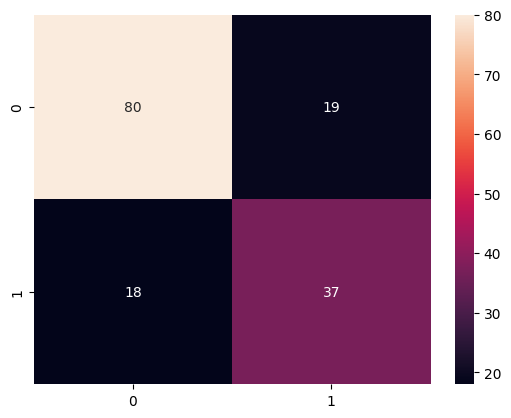


BaggingClassifier()
ACCURACY:  0.7077922077922078
PRECISION: 0.7009490116801438
RECALL:    0.7077922077922078
F1:        0.7028517303203544


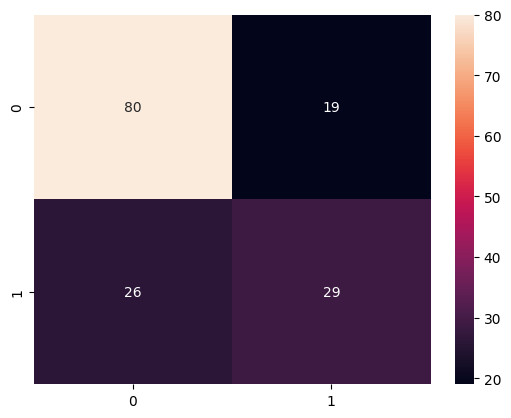


      Metrix     SVC()  SVC(kernel='linear')  SVC(kernel='poly')  \
0   Accuracy  0.766234              0.753247            0.759740   
1  Precision  0.761336              0.753247            0.754464   
2     Recall  0.766234              0.753247            0.759740   
3   F1-score  0.758601              0.753247            0.751042   

   KNeighborsClassifier  MLPClassifier(alpha=  DecisionTreeClassifi  \
0              0.649351              0.642857              0.759740   
1              0.672756              0.413265              0.768458   
2              0.649351              0.642857              0.759740   
3              0.655805              0.503106              0.762525   

   GaussianNB()  PassiveAggressiveCla  RidgeClassifier()  \
0      0.766234              0.357143           0.759740   
1      0.770664              0.127551           0.760751   
2      0.766234              0.357143           0.759740   
3      0.767925              0.187970           0.760213   

 

In [115]:
auto_learning(models, X_train, X_test, y_train, y_test)

Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [116]:
iris = load_iris()


In [117]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [118]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['Outcome'] = iris.target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Outcome            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [119]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [120]:
X.shape, y.shape

((150, 4), (150,))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVC()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


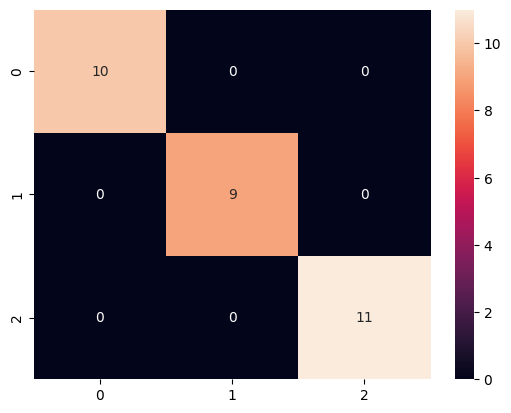


SVC(kernel='linear')
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


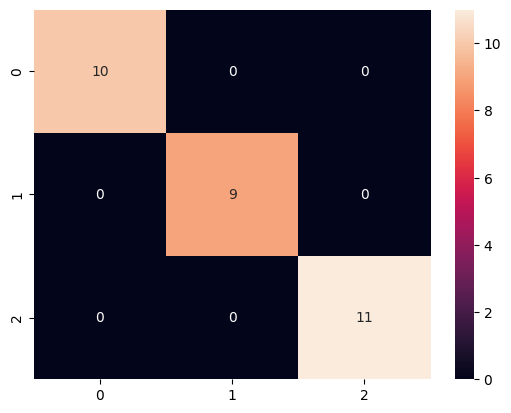


SVC()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


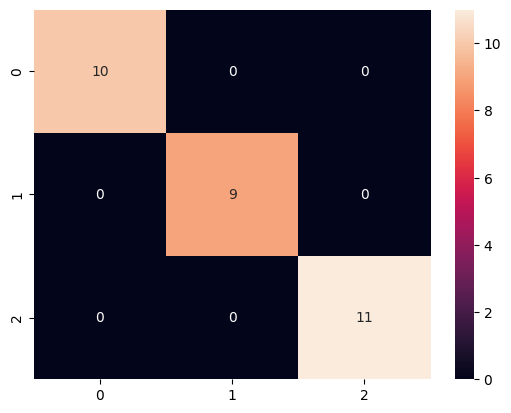


SVC(kernel='poly')
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


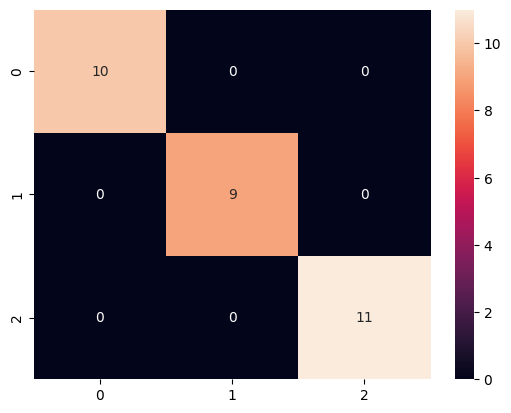


KNeighborsClassifier(n_neighbors=3)
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


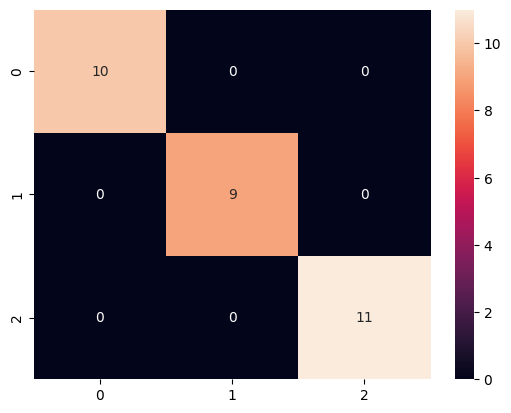


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
ACCURACY:  0.3
PRECISION: 0.09
RECALL:    0.3
F1:        0.13846153846153844


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


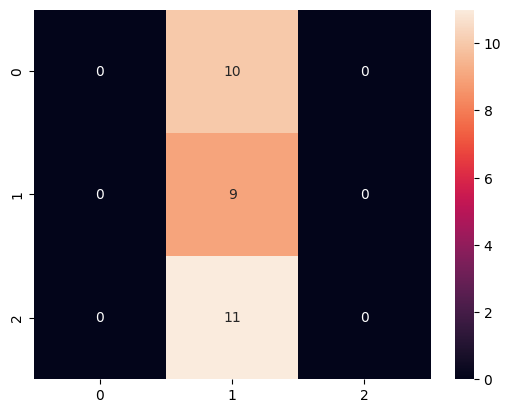

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



DecisionTreeClassifier()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


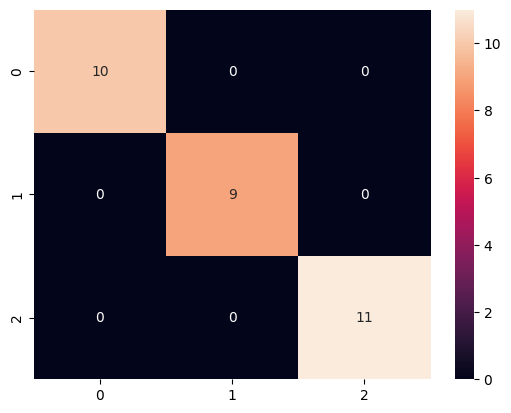


GaussianNB()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


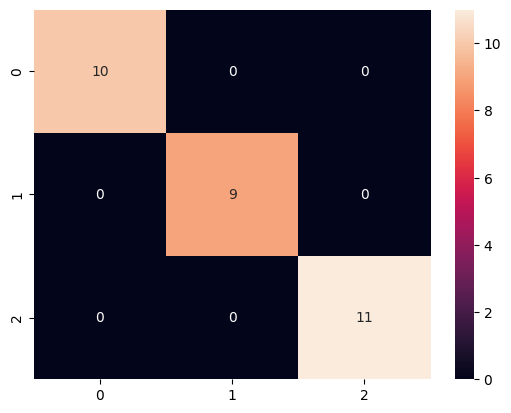


PassiveAggressiveClassifier()
ACCURACY:  0.7
PRECISION: 0.5018518518518519
RECALL:    0.7
F1:        0.5811912225705329


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


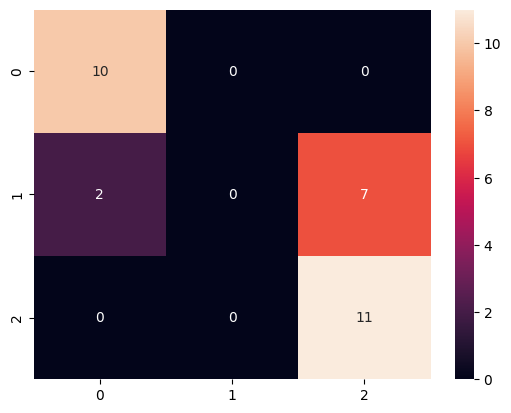

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



RidgeClassifier()
ACCURACY:  0.9
PRECISION: 0.9013888888888889
RECALL:    0.9
F1:        0.89923273657289


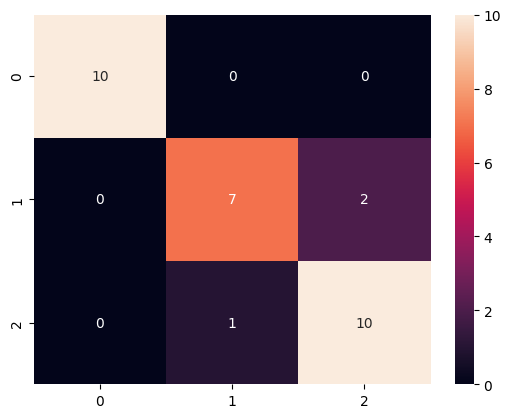


RandomForestClassifier()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


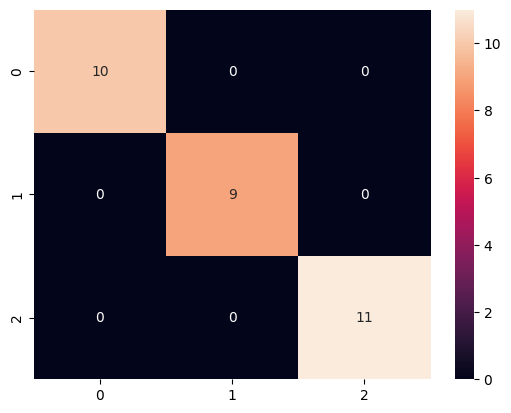


BaggingClassifier()
ACCURACY:  1.0
PRECISION: 1.0
RECALL:    1.0
F1:        1.0


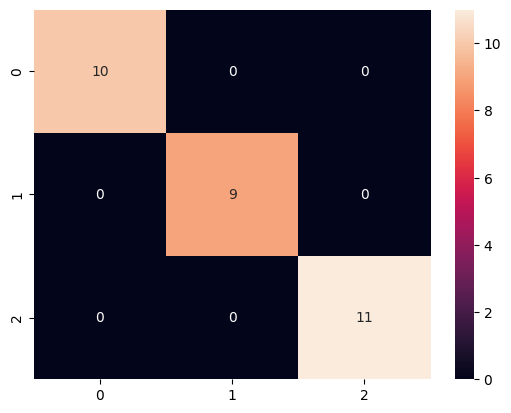


      Metrix  SVC()  SVC(kernel='linear')  SVC(kernel='poly')  \
0   Accuracy    1.0                   1.0                 1.0   
1  Precision    1.0                   1.0                 1.0   
2     Recall    1.0                   1.0                 1.0   
3   F1-score    1.0                   1.0                 1.0   

   KNeighborsClassifier  MLPClassifier(alpha=  DecisionTreeClassifi  \
0                   1.0              0.300000                   1.0   
1                   1.0              0.090000                   1.0   
2                   1.0              0.300000                   1.0   
3                   1.0              0.138462                   1.0   

   GaussianNB()  PassiveAggressiveCla  RidgeClassifier()  \
0           1.0              0.700000           0.900000   
1           1.0              0.501852           0.901389   
2           1.0              0.700000           0.900000   
3           1.0              0.581191           0.899233   

   RandomForestC

In [122]:
auto_learning(models, X_train, X_test, y_train, y_test)